## Problem Statement
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Basically we are selecting best features.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn import preprocessing

from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score


In [2]:
 df = pd.read_csv('Company_Data.csv')

## Data Exploration

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.info()

# There are no nan values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df[df.duplicated()]

# There are no duplicates

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

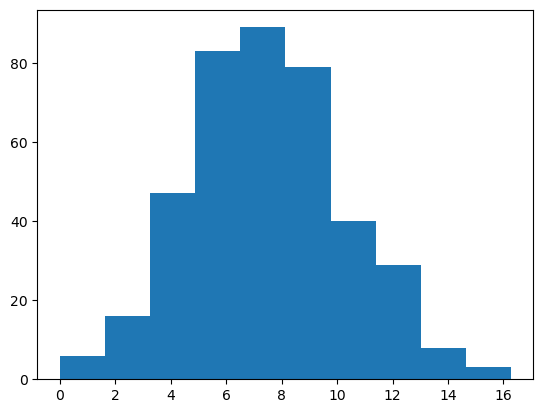

In [53]:
plt.hist(df['Sales'])

In [7]:
#Converting Numerical Data to Categorical as per problem Statement.
# For Sales column lets create 4 lables (0-4) as poor,(4-8) as avg, (9-12) as good, (12-16) as excellent

df['Sales'] = pd.cut(x=df['Sales'],
                     bins=[0, 6 ,11 , 16.27],
                     labels=['Poor', 'Average','Excellent'])

In [8]:
df.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
363,Average,111,75,1,377,108,Good,25,12,Yes,No
180,Poor,137,112,15,434,149,Bad,66,13,Yes,Yes
173,Average,135,91,5,207,128,Medium,66,18,Yes,Yes
88,Average,117,42,7,144,111,Medium,62,10,Yes,Yes
35,Excellent,131,84,11,29,96,Medium,44,17,No,Yes


In [9]:
df.Sales.value_counts()

Average      221
Poor         129
Excellent     49
Name: Sales, dtype: int64

## Data Visualization

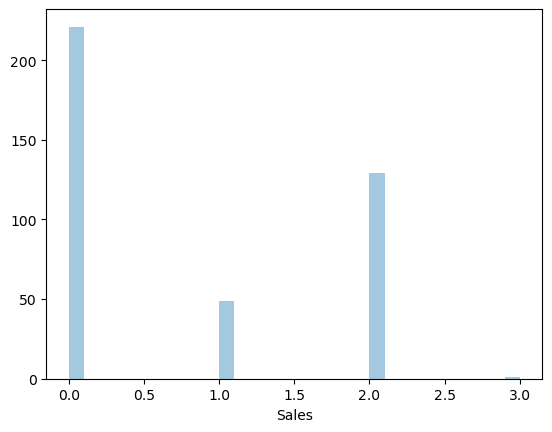

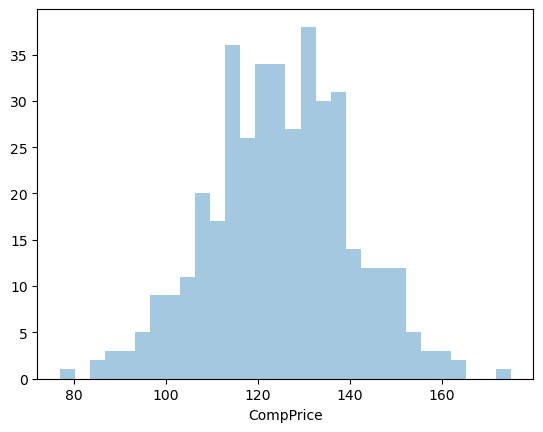

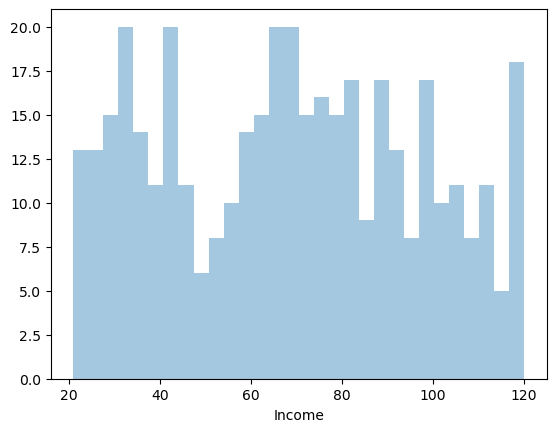

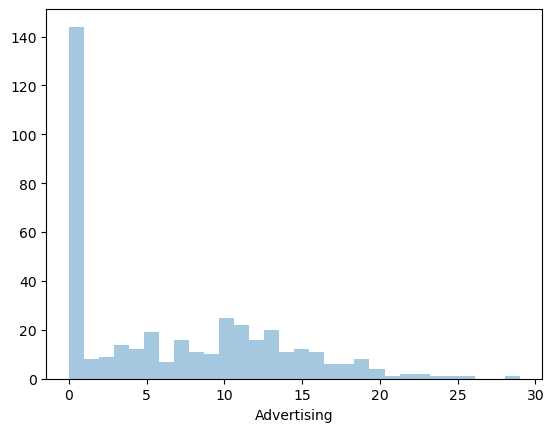

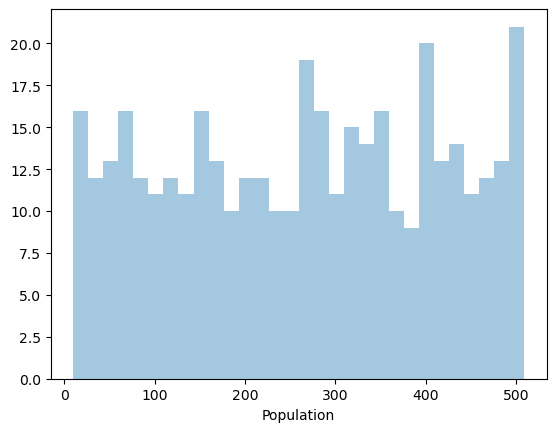

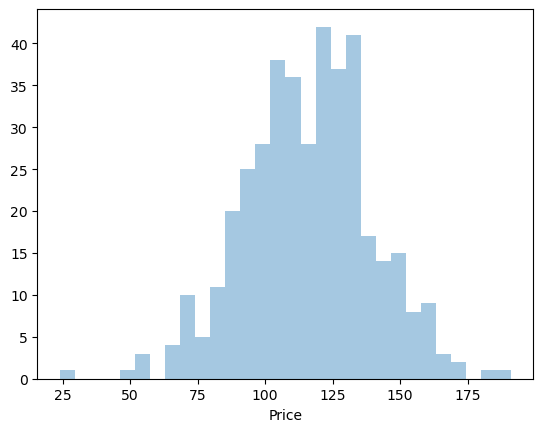

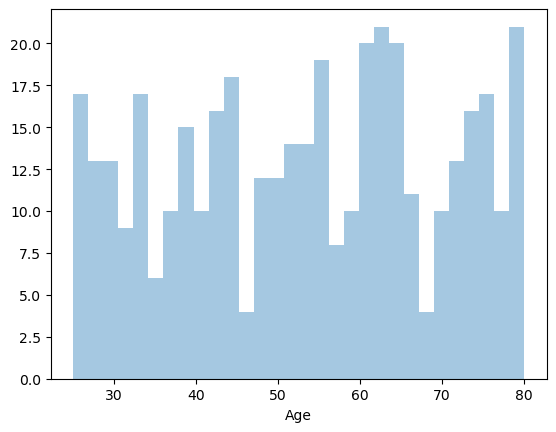

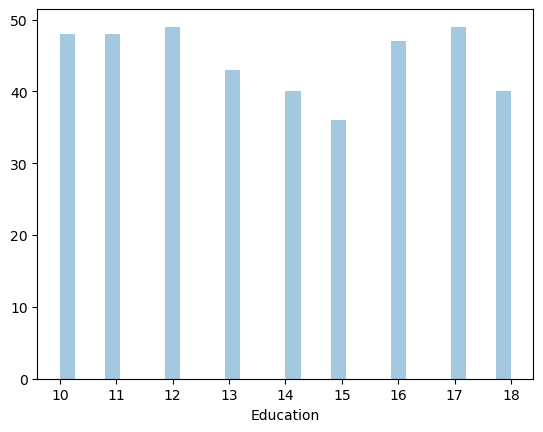

In [22]:
import seaborn as sns

numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    
    sns.distplot(df[feat], kde= False, bins=30)
    plt.show()

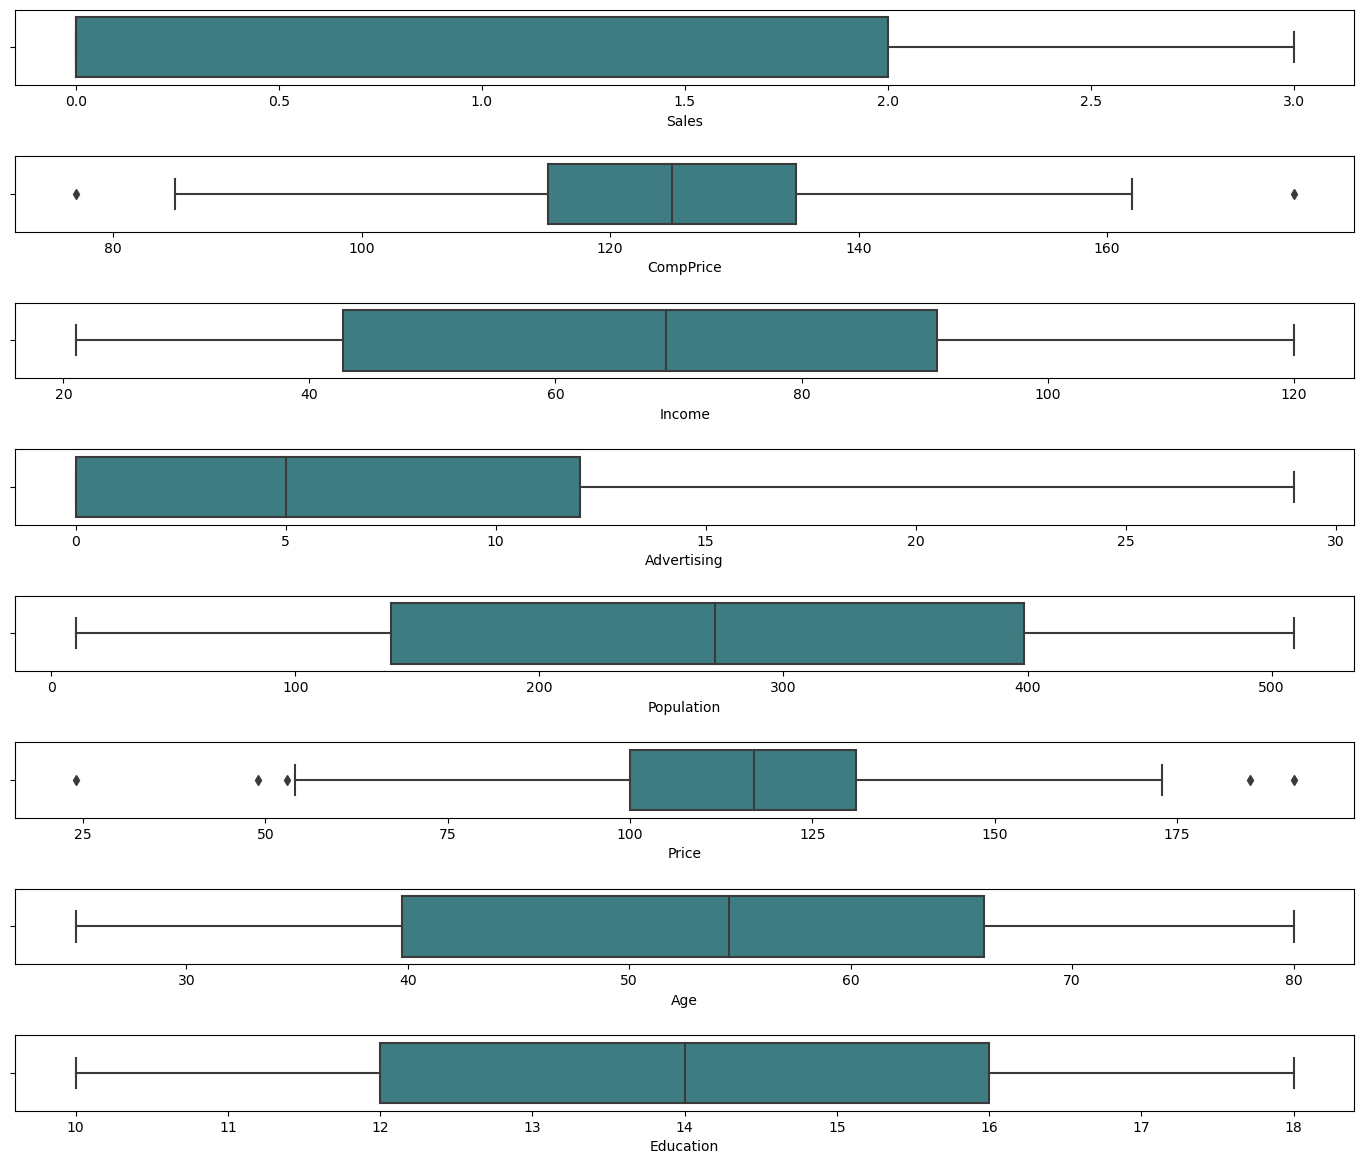

In [23]:
# Detect the outliers using Boxplot.

ot=df.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

<Axes: >

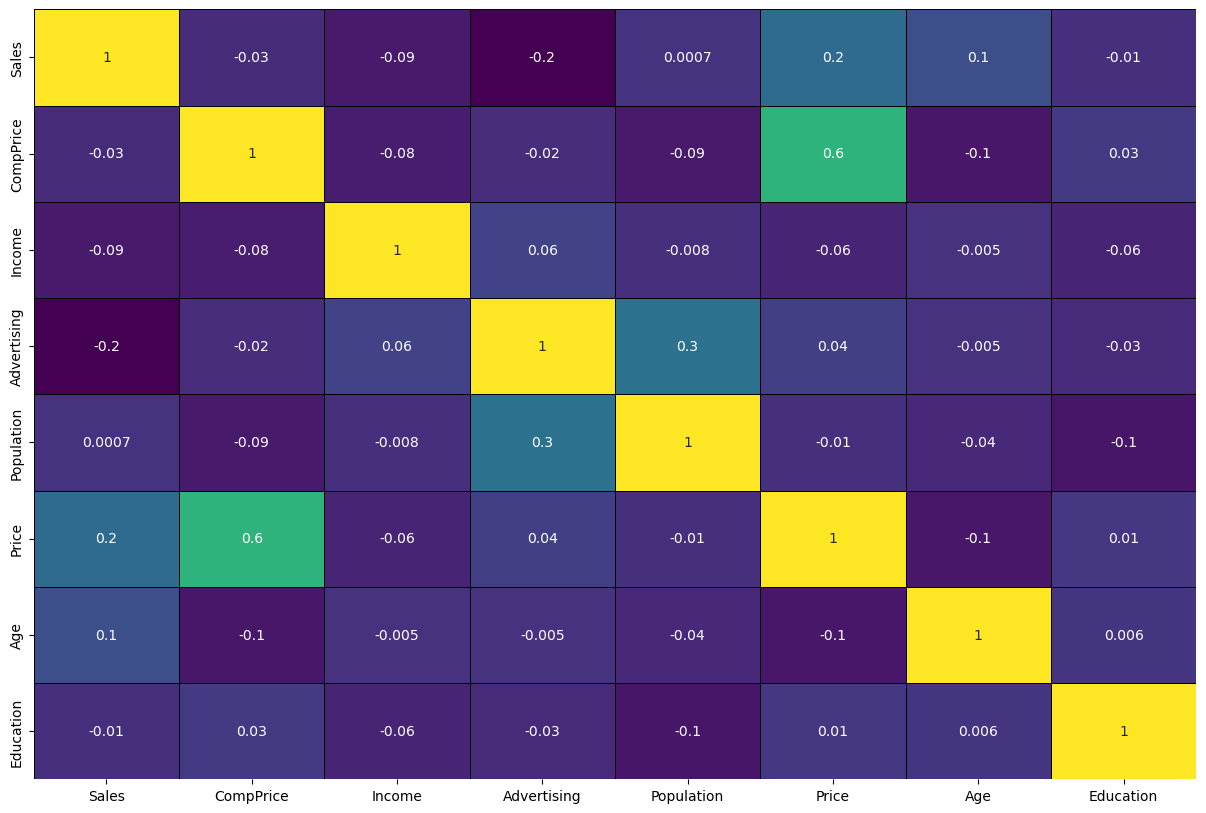

In [24]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

### We can observe that Price and competion price have positive correlation.

## Data Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
LE = LabelEncoder()
df['Sales']=LE.fit_transform(df.iloc[:,0])

In [20]:
df['Sales'].sample(5)

44     2
87     1
136    2
386    2
218    0
Name: Sales, dtype: int32

In [25]:
X = df.iloc[:,1:]

In [26]:
X.sample(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
203,131,82,0,132,157,Bad,25,14,Yes,No
34,115,54,0,406,128,Medium,42,17,Yes,Yes
162,122,74,0,424,149,Medium,51,13,Yes,No


In [27]:
X = pd.get_dummies(X) # One hot encoding the Input Categorical Variables

In [28]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [29]:
y = df['Sales']
y.head()

0    0
1    1
2    0
3    0
4    2
Name: Sales, dtype: int32

In [30]:
#Feature importance

from sklearn.feature_selection import SelectKBest, chi2

In [31]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [32]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [33]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
4,306.816383,Price
2,144.981199,Advertising
1,119.472332,Income
8,81.853398,ShelveLoc_Good
5,74.985230,Age
7,42.414078,ShelveLoc_Bad
3,33.801548,Population
9,11.433908,ShelveLoc_Medium
12,7.574325,US_No
13,4.168814,US_Yes


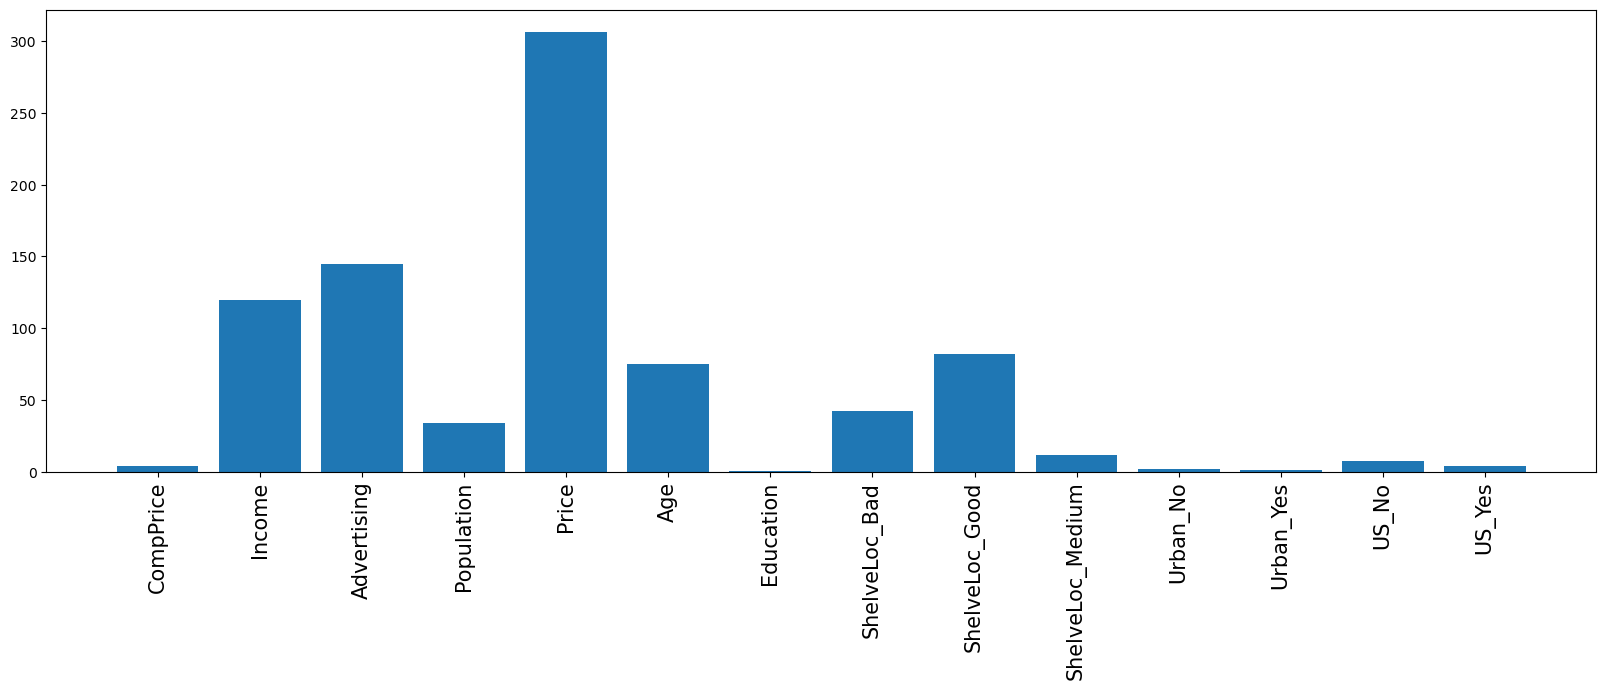

In [34]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

### We can observe that the top 5 features are Price, Advertising, Income, ShelveLoc_Good, Age.

In [36]:
#Splitting data into training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 5)

In [37]:
#Build the Model
DT_clf = DecisionTreeClassifier(max_depth= 4, max_features= 4, min_samples_leaf= 4, min_samples_split= 15)
DT_clf.fit(X_train,y_train)
# Selecting the Best hyperparameters from Grid Search

DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_leaf=4,
                       min_samples_split=15)

In [38]:
y_pred = DT_clf.predict(X_test)

In [39]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(DT_clf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.625  0.6    0.625  0.6375 0.625 ]
Mean CV score: 0.6224999999999999


In [40]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred, average=None))
print(recall_score(y_test,y_pred, average=None))
print(f1_score(y_test,y_pred, average=None))

0.575
[0.60606061 0.         0.46153846]
[0.83333333 0.         0.24      ]
[0.70175439 0.         0.31578947]


[Text(0.6041666666666666, 0.9, 'x[4] <= 137.5\ngini = 0.585\nsamples = 320\nvalue = [173, 42, 104, 1]'),
 Text(0.3333333333333333, 0.7, 'x[9] <= 0.5\ngini = 0.562\nsamples = 269\nvalue = [159, 41, 69, 0]'),
 Text(0.16666666666666666, 0.5, 'x[3] <= 95.5\ngini = 0.638\nsamples = 123\nvalue = [58, 32, 33, 0]'),
 Text(0.08333333333333333, 0.3, 'x[2] <= 1.5\ngini = 0.615\nsamples = 19\nvalue = [3, 7, 9, 0]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.5\nsamples = 12\nvalue = [2, 2, 8, 0]'),
 Text(0.125, 0.1, 'gini = 0.449\nsamples = 7\nvalue = [1, 5, 1, 0]'),
 Text(0.25, 0.3, 'x[8] <= 0.5\ngini = 0.609\nsamples = 104\nvalue = [55, 25, 24, 0]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.518\nsamples = 51\nvalue = [26, 1, 24, 0]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.496\nsamples = 53\nvalue = [29, 24, 0, 0]'),
 Text(0.5, 0.5, 'x[1] <= 56.5\ngini = 0.457\nsamples = 146\nvalue = [101, 9, 36, 0]'),
 Text(0.4166666666666667, 0.3, 'x[2] <= 2.5\ngini = 0.493\nsamples = 50\nvalue = [28, 0, 22

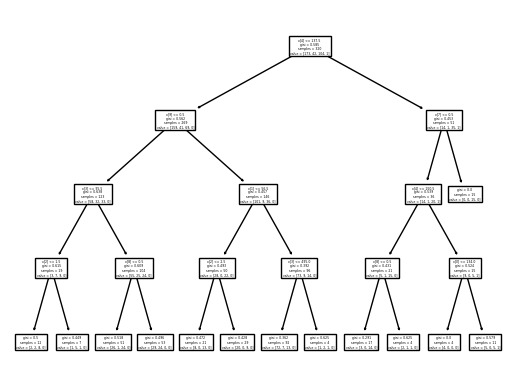

In [41]:
from sklearn.tree import plot_tree
plot_tree(DT_clf)

In [43]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters and their possible values

param_grid = {
    'max_depth': [1,2,3,4,5],
    'max_features':[1,2,3,4,5],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1,2,3,4]
    }

In [44]:
# Create a GridSearchCV object
grid_search = GridSearchCV(DT_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [45]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, max_features=4,
                                              min_samples_leaf=4,
                                              min_samples_split=15),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10, 15, 20, 25]},
             scoring='accuracy')

In [46]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 20}


In [47]:
# Get the best model
best_dt_model = grid_search.best_estimator_

In [48]:
# Evaluate the best model on the test set
accuracy = best_dt_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", accuracy)

Test Accuracy with Best Model: 0.6


In [49]:
#Building the Model using best parameters
DT_clf = DecisionTreeClassifier(max_depth= 4, max_features= 4)
DT_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=4)

[Text(0.5, 0.9, 'x[8] <= 0.5\ngini = 0.585\nsamples = 320\nvalue = [173, 42, 104, 1]'),
 Text(0.25, 0.7, 'x[7] <= 0.5\ngini = 0.536\nsamples = 249\nvalue = [135, 11, 102, 1]'),
 Text(0.125, 0.5, 'x[2] <= 9.5\ngini = 0.504\nsamples = 172\nvalue = [108, 9, 54, 1]'),
 Text(0.0625, 0.3, 'x[4] <= 127.0\ngini = 0.513\nsamples = 109\nvalue = [62, 2, 44, 1]'),
 Text(0.03125, 0.1, 'gini = 0.44\nsamples = 75\nvalue = [52, 2, 21, 0]'),
 Text(0.09375, 0.1, 'gini = 0.455\nsamples = 34\nvalue = [10, 0, 23, 1]'),
 Text(0.1875, 0.3, 'x[5] <= 75.5\ngini = 0.429\nsamples = 63\nvalue = [46, 7, 10, 0]'),
 Text(0.15625, 0.1, 'gini = 0.368\nsamples = 59\nvalue = [46, 7, 6, 0]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]'),
 Text(0.375, 0.5, 'x[2] <= 7.5\ngini = 0.488\nsamples = 77\nvalue = [27, 2, 48, 0]'),
 Text(0.3125, 0.3, 'x[2] <= 5.5\ngini = 0.42\nsamples = 50\nvalue = [15, 0, 35, 0]'),
 Text(0.28125, 0.1, 'gini = 0.459\nsamples = 42\nvalue = [15, 0, 27, 0]'),
 Text(0.34375, 0.

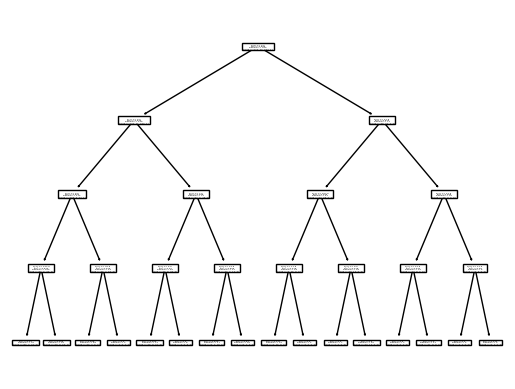

In [50]:
# Visualizing the Tree
plot_tree(DT_clf)

In [51]:
DT_clf.feature_importances_

array([0.        , 0.        , 0.18092678, 0.        , 0.18329151,
       0.13920663, 0.10095479, 0.14153471, 0.25408558, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [52]:
sum(DT_clf.feature_importances_)

0.9999999999999999

In [53]:
X.sample(3)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
293,123,84,0,74,89,59,10,0,1,0,0,1,1,0
124,131,113,0,181,120,63,14,0,1,0,0,1,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1


### Decision Tree is not performing well on this Dataset, The highest Test accuracy recorded after fine tuning the hyperparameters is 60%% which is not a good accuracy score to go further.
### From above analysis these are the features affecting the sale mostly.
### Important Features are : Advertising - 18% ,  ShelveLoc_Medium - 14.11%, Age - 14%, Price- 18.5% and ShelveLoc_Good - 25.4%

In [54]:
y_pred = DT_clf.predict(X_test)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        48
           1       1.00      0.29      0.44         7
           2       0.63      0.68      0.65        25

    accuracy                           0.71        80
   macro avg       0.79      0.59      0.62        80
weighted avg       0.73      0.71      0.70        80

